![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [ ]:
df['price'].unique() 

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

'Площадьземли:1сот'=100 m.kv, 'Договорная'=nan

In [ ]:
df.replace(['Площадьземли:1сот','Договорная'],['100',np.nan],inplace=True)

In [ ]:
df.price=df[df.price.notnull()].price.astype(dtype=np.int64)
df['size']=df['size'].astype(dtype=np.float64)

Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

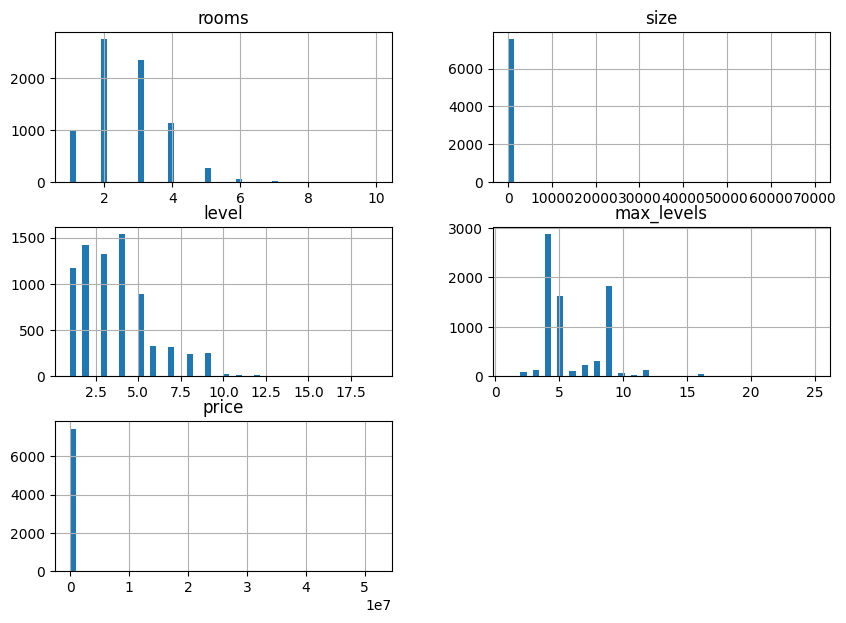

In [ ]:
df.hist(bins=50,figsize=(10,7))
plt.show()

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7565.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,113.267236,3.699273,6.038202,7.133421e+04
std,1.085201,1491.213517,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [ ]:
df=df[(df['size']<2100)&(df['price']<1_000_000)]

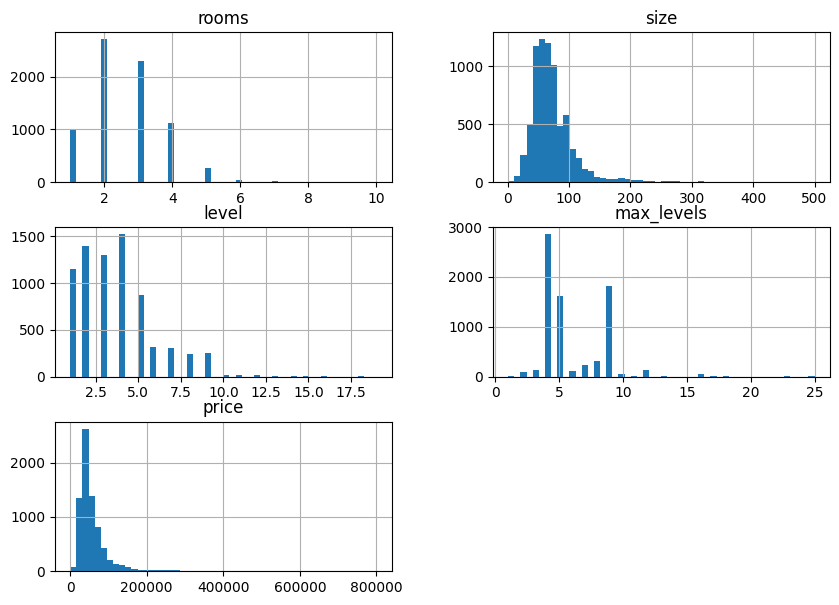

In [ ]:
df.hist(bins=50,figsize=(10,7))
plt.show()

In [ ]:
district=df.district.value_counts()

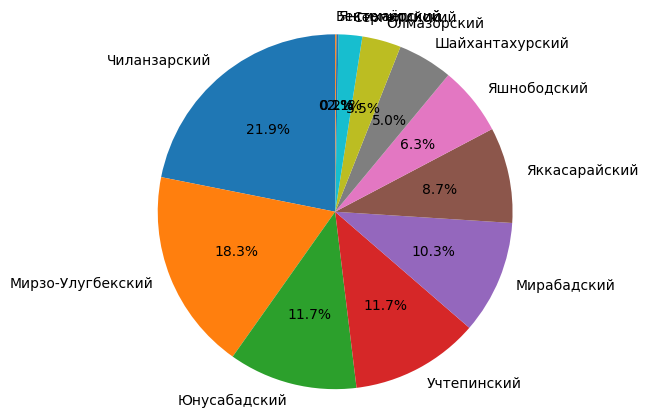

In [ ]:
plt.pie(x=district,labels=district.index,radius=1.2,autopct='%0.01f%%',startangle=90)
plt.show()

Correlation

In [ ]:
df.corrwith(df.price)

<ipython-input-150-d1329e8f9b2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.price)


rooms         0.550465
size          0.762355
level         0.059675
max_levels    0.219041
price         1.000000
dtype: float64

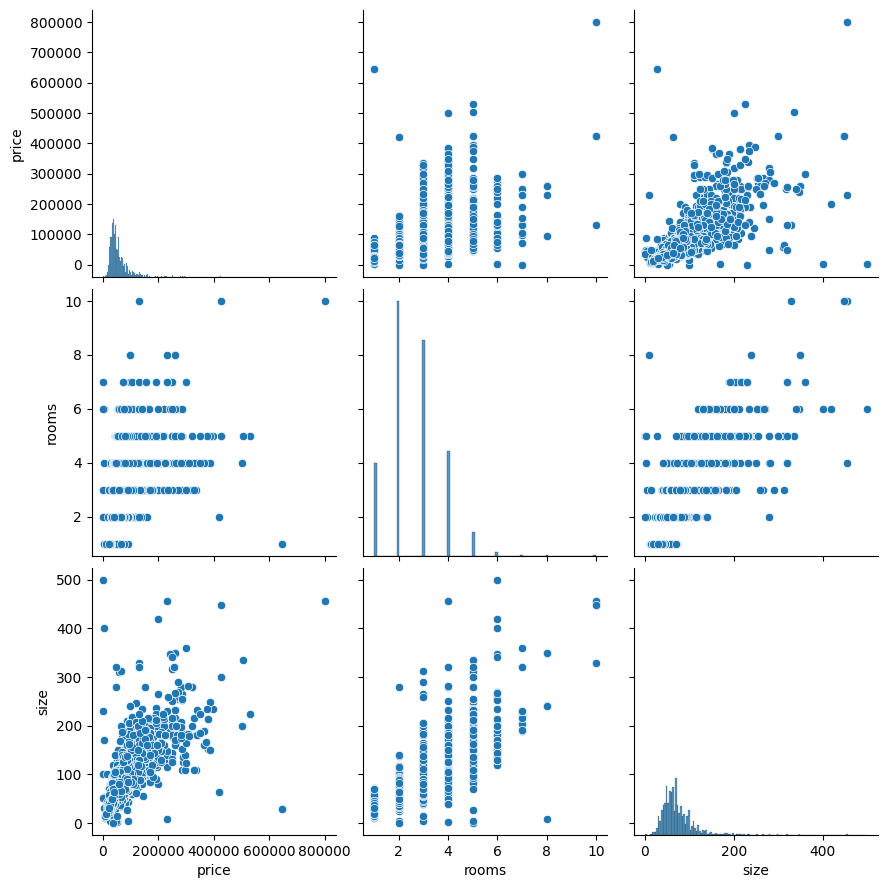

In [ ]:
cols=['price','rooms','size']
sns.pairplot(df[cols],height=3)
plt.show()

Train and Test set

In [ ]:
df.drop('location',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=11)
train_set.shape,test_set.shape

((5957, 6), (1490, 6))

Preprocessing data for ML 

In [ ]:
train_X=train_set.drop('price',axis=1)
y=train_set['price'].copy()

In [ ]:
train_X_num=train_X.drop('district',axis=1)
train_X_num

,rooms,size,level,max_levels
6573,3,72.00,4,9
2410,3,103.00,4,8
5788,2,70.00,3,7
977,2,40.00,5,5
33,1,26.00,2,4
...,...,...,...,...
4084,2,58.00,5,9
7373,5,96.25,4,4
5280,3,64.00,4,5
3835,3,68.00,4,4


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler

num_pipe=Pipeline([
          ('imputer',SimpleImputer(strategy='median')),
          ('MinMax',MinMaxScaler())
])
num_pipe.fit_transform(train_X_num)

array([[0.22222222, 0.14228457, 0.16666667, 0.33333333],
       [0.22222222, 0.20440882, 0.16666667, 0.29166667],
       [0.11111111, 0.13827655, 0.11111111, 0.25      ],
       ...,
       [0.22222222, 0.12625251, 0.16666667, 0.16666667],
       [0.22222222, 0.13426854, 0.16666667, 0.125     ],
       [0.33333333, 0.19238477, 0.        , 0.33333333]])

In [ ]:
from sklearn.compose import ColumnTransformer

nums=list(train_X_num)
cats=['district']

full_pipe=ColumnTransformer([
              ('numbers',num_pipe,nums),
              ('category',OrdinalEncoder(),cats)
])


In [ ]:
X_prepared=full_pipe.fit_transform(train_X)
X_prepared[0]

array([0.22222222, 0.14228457, 0.16666667, 0.33333333, 6.        ])

## Using Regression models

1.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(X_prepared,y)

LinearRegression()

In [ ]:
LR_model.predict(X_prepared)

array([59262.48777449, 93488.80884407, 60203.71639739, ...,
       42129.29463944, 51240.91363752, 87524.56887086])

In [ ]:
test_X=test_set.drop('price',axis=1)
test_y=test_set['price'].copy()

test_y_prepared=full_pipe.fit_transform(test_X)


In [ ]:
test_y_predicted=LR_model.predict(test_y_prepared)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(test_y,test_y_predicted)
mae

15973.579361315062

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(test_y,test_y_predicted)
np.sqrt(mse)


27259.014525178387

2.RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(X_prepared,y)

RandomForestRegressor()

In [ ]:
test_y_predicted=RF_model.predict(test_y_prepared)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(test_y,test_y_predicted)
mae

13833.332927770065

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(test_y,test_y_predicted)
np.sqrt(mse)

25075.408222265178

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y,test_y_predicted)*100

67.67941674278927

3.Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
cross_predict=cross_val_score(RF,X_prepared,y,scoring='neg_mean_squared_error',cv=5)
cross_predict

array([-5.26644398e+08, -1.06188354e+09, -1.28822254e+09, -9.58348247e+08,
       -5.06185409e+08])

In [ ]:
def Overall(scores):
  print('Scores: ',scores)
  print('Mean: ',np.mean(scores))
  print('Std: ',np.std(scores))

Overall(np.sqrt(-cross_predict))

Scores:  [22948.73413081 32586.5546602  35891.81715073 30957.20024104
 22498.56459654]
Mean:  28976.574155867267
Std:  5349.296922537759


In [ ]:
import joblib

filename='Tashkent_house_price_prediction.jbl'
joblib.dump(RF_model,filename)

['Tashkent_house_price_prediction.jbl']